# Project Phase 2
#### Amina Shikhalieva (as2642), Gauri Pidatala (vp223)


### Research Questions:


##### What makes a class "good" ?
* How do variables such as class size, course level, and Piazza activity correlate sentiment towards a course?

### Data Collection and Cleaning


We primarily use web scraping to acquire data and store it in two tables.

**piazza.com** 
* Every course on Piazza has a stats report accessible to anyone enrolled in the class (under the statistics tab). A few courses do not have this report because there was not enough piazza activity. 
* We compiled a list of courses from various departments taught in various semesters that used piazza.com as an interactive platform. For each of these courses, we recorded the URL for its stats page in the file "piazza_stats.txt". We then iterated through each of the URLs in the file and recorded in [ piazza .csv ] various attributes for each course:

**ratemyprofessors.com** 
* We manually associate each course element of our piazza.csv database with the name of the professor who taught it that semester. We then manually aqcuire the URLs of the associated ratemyprofessors.com page of each of these professors and record them in the file "Rate_my_prof.txt". We then iterate through each URL in this file and scrape the necessary attributes for each review for the course we are looking for.
* Because a review page for a professor includes many 
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# piazza_data = pd.read_csv('')
ratings_data = pd.read_csv('rmp.csv')

**cleaning**
* As of now, some of our piazza stats include both names for crosslisted courses:

    * To clean them, we will only keep the department name, not the distribution requirement category:

* Because the piazza stats reports don't mention the semester of the course, we can use the recorded dates there to determing it ourselves (eg, 1/8/19 = FA19): 

    * Now that we can identify a course by its number and the semester it was taught, we can remove duplicates:

* Some ratemyprofessors.com reviews are void because when they were scraped the ads on the page corrupted some of the observations (they weren't actual reviews) :

In [2]:
print(ratings_data)

               Name Quality Difficulty Would Take Again            Date
0       Haym Hirsh      4.0        3.0              Yes  May 11th, 2020
1       Haym Hirsh      4.0        3.0              Yes   Apr 9th, 2020
2       Haym Hirsh      1.0        2.0               No  Dec 14th, 2019
3       Haym Hirsh      1.0        4.0               No  Nov 12th, 2019
4       Haym Hirsh     None       None             None            None
..              ...     ...        ...              ...             ...
309  Alex Townsend      5.0        4.0              Yes  Apr 15th, 2018
310  Alex Townsend     None       None             None            None
311   David Muller      5.0        3.0             None  Dec 17th, 2012
312   David Muller      4.5        1.0             None  Dec 13th, 2011
313   David Muller      1.0        5.0             None   Apr 1st, 2006

[314 rows x 5 columns]


    * So we need to remove these observations. Every review is guaranteed to have a quality rating, so:

In [3]:
# ratings_data = ratings_data.drop(ratings_data['Difficulty'] == None)
ratings_data = ratings_data.copy()[ratings_data.Quality != 'None']
print(ratings_data)

               Name Quality Difficulty Would Take Again            Date
0       Haym Hirsh      4.0        3.0              Yes  May 11th, 2020
1       Haym Hirsh      4.0        3.0              Yes   Apr 9th, 2020
2       Haym Hirsh      1.0        2.0               No  Dec 14th, 2019
3       Haym Hirsh      1.0        4.0               No  Nov 12th, 2019
5       Haym Hirsh      5.0        3.0              Yes  Jun 28th, 2019
..              ...     ...        ...              ...             ...
308  Alex Townsend      5.0        4.0              Yes  May 18th, 2018
309  Alex Townsend      5.0        4.0              Yes  Apr 15th, 2018
311   David Muller      5.0        3.0             None  Dec 17th, 2012
312   David Muller      4.5        1.0             None  Dec 13th, 2011
313   David Muller      1.0        5.0             None   Apr 1st, 2006

[244 rows x 5 columns]


### Data Description 


### Data Limitations 


* As of now, we only have a relatively small sample of courses ...
* Some professors on ratemyprofessors.com have only a few reviews ...
    - We need to acknowledge that people usually only write reviews if they have a strong opinion (there's a name for htis kind of bias) 
* We need to make sure we are aware of the impacts of covid 
    - For instance Nate Foster got a ton of positive reviews after he made his course super accomodating when covid first struck

### Exploratory Data Analysis

### Piazza:

* Compare percentage of active piazza users across departments: 

    * So,

* Relate intructor response time with percentage of active piazza users:

    * So,

### Ratemyprofessors:

* Compare difficulty ratings across departments:

In [4]:
# diff_by_dept = ratings_data.groupby(by = 'Department')['']

    * So, 

**Relate course difficulty with course rating per review:**

Text(0, 0.5, 'Difficulty Ratings')

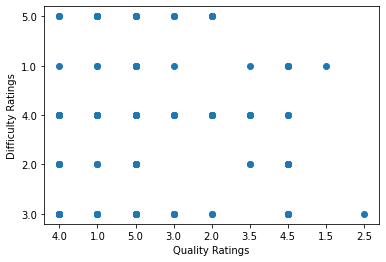

In [6]:
plt.scatter(ratings_data['Quality'], ratings_data['Difficulty'])
plt.xlabel('Quality Ratings')
plt.ylabel('Difficulty Ratings')

    * Based on the above plot, there is no apparent correlation between the quality of a professor's teaching and the difficulty of the class they taught. This might be due to many factors, including that some students want to be challenged by a class while some want to get a higher grade with less effort, or possibly that students do not associate the teaching skills of a particular professor with the difficulty of the material they teach, as it could just be the nature of the course to be more material heavy or abstract/technical.

**Relate course difficulty with course level:**

    * So, 

#### Cross analysis:

* Relate course rating with percentage of active users:

    * So, 

* Relate course difficulty with percentage of active users: 

    * So, 

### Questions for reviewers

* Do we have enough data to form significant data analysis with? Some of the professors we are looking at have relatively few reviews and we're not sure how much this says about a professor, if anything useful at all